## Exercici
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler

*Per fer l'exercici agafem datasets de les estadístiques per lligues de futbol que hi han a [football-data.co.uk](https://www.football-data.co.uk/englandm.php).*

*Extreurem les dades d'un equip en concret de la premier league anglesa desde l'any 2000 fins l'actualitat. Haurem d'importar els datasets de cadascuna de les temporades i concatenar-los en un de sol. Posteriorment transformarem les dades perque ens mostrin la informació des del punt de vista subjectiu de l'equip en qüestió*

In [1]:
import os
import glob

import math
import pandas as pd
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime

In [2]:
#generem una llista amb el paths dels csv a importar que ens hem descarregat a un directori
datasets_path = r"D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets\football stats\Premier league" + os.sep
all_files = glob.glob(datasets_path + "/*.csv")

#importem tots el datasets en un de sol excepte el de la de la temporada actual, que com s'està jugant, la importem d'URL
pd.options.display.max_columns = None
df = pd.concat((pd.read_csv(f) for f in all_files))
df = pd.concat([df, pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")])
df.sample(3)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR,HBP,ABP,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SYH,SYD,SYA,B365H,B365D,B365A,SOH,SOD,SOA,GB>2.5,GB<2.5,B365>2.5,B365<2.5,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,GBAHH,GBAHA,GBAH,LBAHH,LBAHA,LBAH,B365AHH,B365AHA,B365AH,BWH,BWD,BWA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,BSH,BSD,BSA,PSH,PSD,PSA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
187,E0,22/12/2002,Liverpool,Everton,0.0,0.0,D,0.0,0.0,D,NaN,G Poll,14.0,5.0,8.0,2.0,NaN,NaN,7.0,4.0,14.0,20.0,NaN,NaN,3.0,4.0,0.0,0.0,NaN,NaN,1.8,3.35,4.1,1.8,3.1,3.8,1.91,3.25,3.4,1.909,3.2,3.75,1.80,3.25,3.8,NaN,NaN,NaN,1.833,3.25,3.75,1.91,3.25,3.5,1.8,1.80,1.90,1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,E0,23/10/2020,Aston Villa,Leeds,0.0,3.0,A,0.0,0.0,D,NaN,P Tierney,12.0,27.0,4.0,9.0,NaN,NaN,6.0,5.0,14.0,17.0,NaN,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.1,3.5,3.3,NaN,NaN,NaN,NaN,NaN,NaN,2.10,3.70,3.3,NaN,NaN,NaN,2.050,3.75,3.30,NaN,NaN,NaN,NaN,NaN,1.57,2.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.86,2.07,NaN,2.15,3.6,3.25,NaN,NaN,NaN,2.1,3.7,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,3.83,3.44,1.93,4.12,3.88,20:00,2.16,3.9,3.47,2.11,3.75,3.33,1.62,2.45,1.65,2.47,1.61,2.36,-0.25,1.86,2.08,1.88,2.09,1.84,2.05,1.85,4.0,3.8,1.9,3.9,3.75,1.9,3.7,3.75,1.95,3.9,3.6,1.87,3.9,3.9,2.01,4.15,3.92,1.91,3.99,3.73,1.5,2.62,1.51,2.72,1.58,2.72,1.52,2.53,-0.5,1.9,2.03,1.93,2.01,1.95,2.05,1.9,1.98
183,E0,21/12/2002,Newcastle,Fulham,2.0,0.0,H,1.0,0.0,H,NaN,A Wiley,19.0,6.0,14.0,0.0,NaN,NaN,7.0,6.0,5.0,10.0,NaN,NaN,0.0,2.0,0.0,1.0,NaN,NaN,1.6,3.80,5.9,1.6,3.4,4.6,1.44,3.75,6.0,1.533,3.4,6.00,1.53,3.40,5.5,NaN,NaN,NaN,1.533,3.50,5.50,1.53,3.40,6.0,1.8,1.84,1.72,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#comprovant valors nulls veiem que ens surt una fila sencera de NaNs
df[df.HomeTeam.isna()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR,HBP,ABP,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SYH,SYD,SYA,B365H,B365D,B365A,SOH,SOD,SOA,GB>2.5,GB<2.5,B365>2.5,B365<2.5,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,GBAHH,GBAHA,GBAH,LBAHH,LBAHA,LBAH,B365AHH,B365AHA,B365AH,BWH,BWD,BWA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,BSH,BSD,BSA,PSH,PSD,PSA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#l'esborrem doncs és buida
df.dropna(subset=["HomeTeam"], inplace=True)
df.shape

(7980, 166)

*[informació les columnes](https://www.football-data.co.uk/notes.txt)*

Columnes que tenim en compte:

- Date = Match Date (dd/mm/yy)
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards

In [5]:
#tenim tots aquests equips al dataset
df.HomeTeam.unique()

array(['Charlton', 'Chelsea', 'Coventry', 'Derby', 'Leeds', 'Leicester',
       'Liverpool', 'Sunderland', 'Tottenham', 'Man United', 'Arsenal',
       'Bradford', 'Ipswich', 'Middlesbrough', 'Everton', 'Man City',
       'Newcastle', 'Southampton', 'West Ham', 'Aston Villa', 'Bolton',
       'Blackburn', 'Fulham', 'Birmingham', 'West Brom', 'Portsmouth',
       'Wolves', 'Norwich', 'Crystal Palace', 'Wigan', 'Reading',
       'Sheffield United', 'Watford', 'Hull', 'Stoke', 'Burnley',
       'Blackpool', 'QPR', 'Swansea', 'Cardiff', 'Bournemouth',
       'Brighton', 'Huddersfield'], dtype=object)

In [6]:
#utilitzarem la funció definida en la pràctica d'estadística que donat un equip pel nostre dataset ens retorna un dataframe 
#amb la informació subjectiva i unificada per l'equip en concret, i per partit
def df_de_dades_x_team(team, df=df):
    new_cols = ["DATE", "TEAM", "GOLS_FAVOR", "GOLS_CONTRA", "RESULTAT", "XUTS", "XUTS_REBUTS", 
                "XUTS_PORTA", "XUTS_PORTA_REBUTS", "CORNERS_LLENÇATS", "CORNERS_REBUTS", 
                "FALTES_COMESES", "FALTES_REBUDES", "TARGETES"]
    
    #partits de local
    old_cols = ["Date", "HomeTeam", "FTHG", "FTAG", "FTR", "HS", "AS", 
                "HST", "AST", "HC", "AC", "HF", "AF", "HY"]    
    local_team_df = df[(df.HomeTeam == team)]
    rename = dict(zip(old_cols, new_cols))
    local_team_df = local_team_df.rename(columns=rename)[new_cols]
    #Mapegem la columna de RESULTAT considerant que es local 
    resultat_dic = {"H": "Win", "D": "Draw", "A": "Lose"}
    local_team_df.RESULTAT = local_team_df.RESULTAT.map(resultat_dic)
    
    #partits de visitant
    old_cols = ["Date", "AwayTeam", "FTAG", "FTHG", "FTR", "AS", "HS", 
                "AST", "HST", "AC", "HC", "AF", "HF", "AY"]
    away_team_df = df[df.AwayTeam == team]
    rename = dict(zip(old_cols, new_cols))
    away_team_df = away_team_df.rename(columns=rename)[new_cols]
    #Mapegem la columna de RESULTAT considerant que es visitant 
    resultat_dic = {"H": "Lose", "D": "Draw", "A": "Win"}
    away_team_df.RESULTAT = away_team_df.RESULTAT.map(resultat_dic)
    
    #afegim una columna booleana per especificicar si juga de local o visitant
    local_team_df["LOCAL"] = True
    away_team_df["LOCAL"] = False
    
    #finamlment retornem els dos dataframes concatenats
    return local_team_df.append(away_team_df)

In [7]:
#fem un nou dataframe de cada partit desde el punt de vista subjectiu d'un equip: "Man City"
team = "Man City"
team_data_df = df_de_dades_x_team(team)
team_data_df.sample(3)

,DATE,TEAM,GOLS_FAVOR,GOLS_CONTRA,RESULTAT,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,LOCAL
175,26/12/13,Man City,2.0,1.0,Win,20.0,12.0,6.0,5.0,7.0,6.0,10.0,9.0,1.0,True
90,28/11/2020,Man City,5.0,0.0,Win,19.0,9.0,6.0,1.0,6.0,4.0,12.0,4.0,0.0,True
91,26/10/2019,Man City,3.0,0.0,Win,25.0,11.0,9.0,5.0,13.0,7.0,10.0,5.0,1.0,True


### Atributs categòrics en dummy

*Com a consideració previa respecte a la transformació numèrica binària de les característiques categòriques podem afirmar que de cadascun dels possibles valors que prengui la característica sempre n'hi haurà un que no ens aportarà informació i podem codificar els possibles valors de cada categoria amb una dimensió menys (és a dir, p.ex. considerant la informació categòrica R:Win, R:Draw y R:Loose, sempre que dos d'ells siguin 0 el tercer serà 1, y sempre que de dos d'ells nhi hagi un que sigui 1, el tercer sera 0). Per aquesta raó, per tal d'evitar redundàncies, i de reduïr les dimensions del dataframe, aplicarem l'argument **drop_first=True**.*

In [8]:
#convertim a numèriques binàries la categòrica de RESULTAT generant noves columnes amb get_dummies
team_data_df = pd.get_dummies(data=team_data_df, columns=["RESULTAT"], prefix="R", prefix_sep=':', drop_first=True)

#passem la columna booleana a numèrica binària
team_data_df.LOCAL = team_data_df.LOCAL.astype("int")

team_data_df.sample(3)

,DATE,TEAM,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,LOCAL,R:Lose,R:Win
61,30/09/2017,Man City,1.0,0.0,17.0,4.0,6.0,2.0,8.0,4.0,13.0,8.0,2.0,0,0,1
370,12/05/2019,Man City,4.0,1.0,20.0,6.0,9.0,2.0,6.0,2.0,8.0,12.0,0.0,0,0,1
350,04/05/13,Man City,0.0,0.0,12.0,7.0,8.0,1.0,4.0,4.0,10.0,9.0,0.0,0,0,0


In [9]:
#la columna temporal "DATE" porta inplícita informació categòrica que podriem extreure i passar a numèrica com per exemple
#el dia de la setmana (també du dades numèriques com dia, mes i any)
#podem observar que aL dataset hi ha dates en format MM/DD/AA i MM/DD/AAAA (hem de tenir-ho en compte)
def convert_datetime(date):
    if len(date) == 8: return pd.to_datetime(date, format='%d/%m/%y')
    else: return pd.to_datetime(date, format='%d/%m/%Y')
    
team_data_df.DATE = team_data_df.DATE.apply(convert_datetime)

#generem les noves columnes d'informació de data (agafarem dia setmana de categòrica i any de numèrica)
team_data_df["DIA_SET"] = team_data_df.DATE.dt.day_name()
team_data_df["ANY"] = team_data_df.DATE.dt.year

#passem a columnes numèriques binàries els dies de la setmana
team_data_df = pd.get_dummies(data=team_data_df, columns=["DIA_SET"], prefix="D", prefix_sep=':', drop_first=True)

#esborrem la columna de DATE i de l'equip
team_data_df.drop(columns=["DATE", "TEAM"], inplace=True)
team_data_df.sample(3)

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,LOCAL,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
161,0.0,1.0,8.0,5.0,3.0,2.0,6.0,2.0,8.0,9.0,1.0,1,1,0,2004,0,1,0,0,0,0
258,6.0,0.0,15.0,12.0,9.0,4.0,2.0,2.0,9.0,13.0,1.0,1,0,1,2019,0,0,1,0,0,0
153,0.0,2.0,8.0,11.0,2.0,4.0,6.0,4.0,13.0,17.0,4.0,0,1,0,2005,0,1,0,0,0,0


### Normalitza els atributs numèrics amb StandardScaler

In [10]:
#funció per identificar les columnes en binàries y no binaries. De les no binàries dibuixarà les distribucions en violinplot 
#i realitzarà, amb shapiro, el test de normalitat (verd les que es distribueixen normalment i vermell les que no),
#i de les primeres, les binàries, dibuixarà el barplot

def plot_distributions(df, cols):
    cols = list(cols)
    dec, num = math.modf(len(cols)/5)
    if dec == 0: rows = int(num)
    else: rows = int(num+1)
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,rows*4))
    
    binary = {0, 1}
    for i, col in zip(range(len(cols)), cols):
        counts = df[col].value_counts()
        if set(counts.index.to_list()) == binary:
            plt.subplot(rows, 5, i+1)
            sns.barplot(x=counts.index, y=counts.values)
            plt.title(col + ": binària")
            plt.xlabel("")
        else:
            stat, p = shapiro(df[col])
            if p > 0.05: 
                title = '{}: Normal\n'.format(col)
                color = "g"
            else:
                title = '{}: NO Normal\n'.format(col)
                color = "r"
            title += 'stat=%.3f, p=%.3f\n' % (stat, p)
            plt.subplot(rows, 5, i+1)
            ax = sns.violinplot(x=col, data=df, color=color, orient='h', linewidth=1 , width=.5)
            if len(set(counts)) == 2: 
                title += "Dicotòmica"
                plt.xticks(ticks=counts.index, labels=counts.index.map('{:,.2f}'.format))
            plt.title(title, y=.8)
            plt.xlabel("")            
    plt.show()

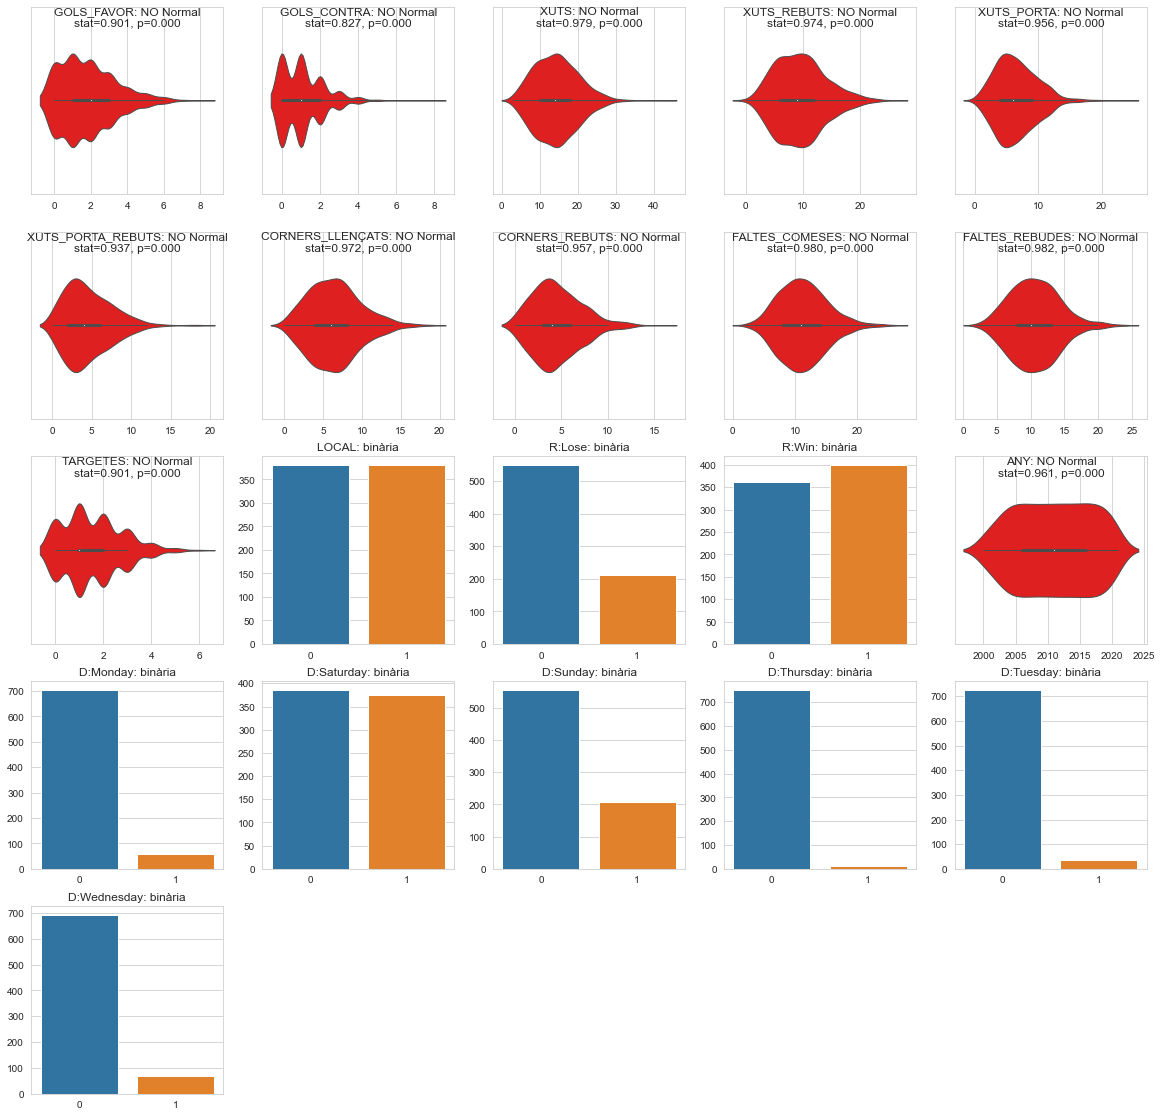

In [11]:
#visualitzem les dades numèriques
plot_distributions(team_data_df, team_data_df.columns)

In [12]:
#Estandaritzem les característiques amb StandardScaler
standardscaler = preprocessing.StandardScaler()
standarized_data_df = pd.DataFrame(standardscaler.fit_transform(team_data_df), columns=team_data_df.columns)
standarized_data_df.head()

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,LOCAL,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
0,1.439102,0.832061,0.114559,-0.122421,1.048369,-0.170284,0.166923,-0.575332,3.324624,0.931590,1.183885,1.0,-0.619948,0.951190,-1.856252,-0.284747,-0.986928,-0.609788,-0.11547,-0.222988,3.164568
1,-0.536306,0.832061,-0.059571,-0.122421,-0.472166,1.157060,-0.432895,0.177254,-1.105465,0.381894,0.366671,1.0,1.613039,-1.051315,-1.856252,-0.284747,1.013246,-0.609788,-0.11547,-0.222988,-0.315999
2,-0.536306,-0.071319,-0.581959,-1.262612,-0.776273,-0.833956,0.766741,-0.575332,0.979283,0.107046,0.366671,1.0,-0.619948,-1.051315,-1.856252,-0.284747,-0.986928,1.639915,-0.11547,-0.222988,-0.315999
3,-1.194775,-0.071319,-0.930218,1.245809,0.136048,1.488896,1.066650,1.306133,1.239876,0.381894,-1.267757,1.0,1.613039,-1.051315,-1.856252,-0.284747,1.013246,-0.609788,-0.11547,-0.222988,-0.315999
4,0.122163,-0.974700,-0.233700,0.105618,1.048369,-0.833956,-0.432895,0.553547,-0.323685,1.481285,-1.267757,1.0,-0.619948,0.951190,-1.856252,-0.284747,1.013246,-0.609788,-0.11547,-0.222988,-0.315999


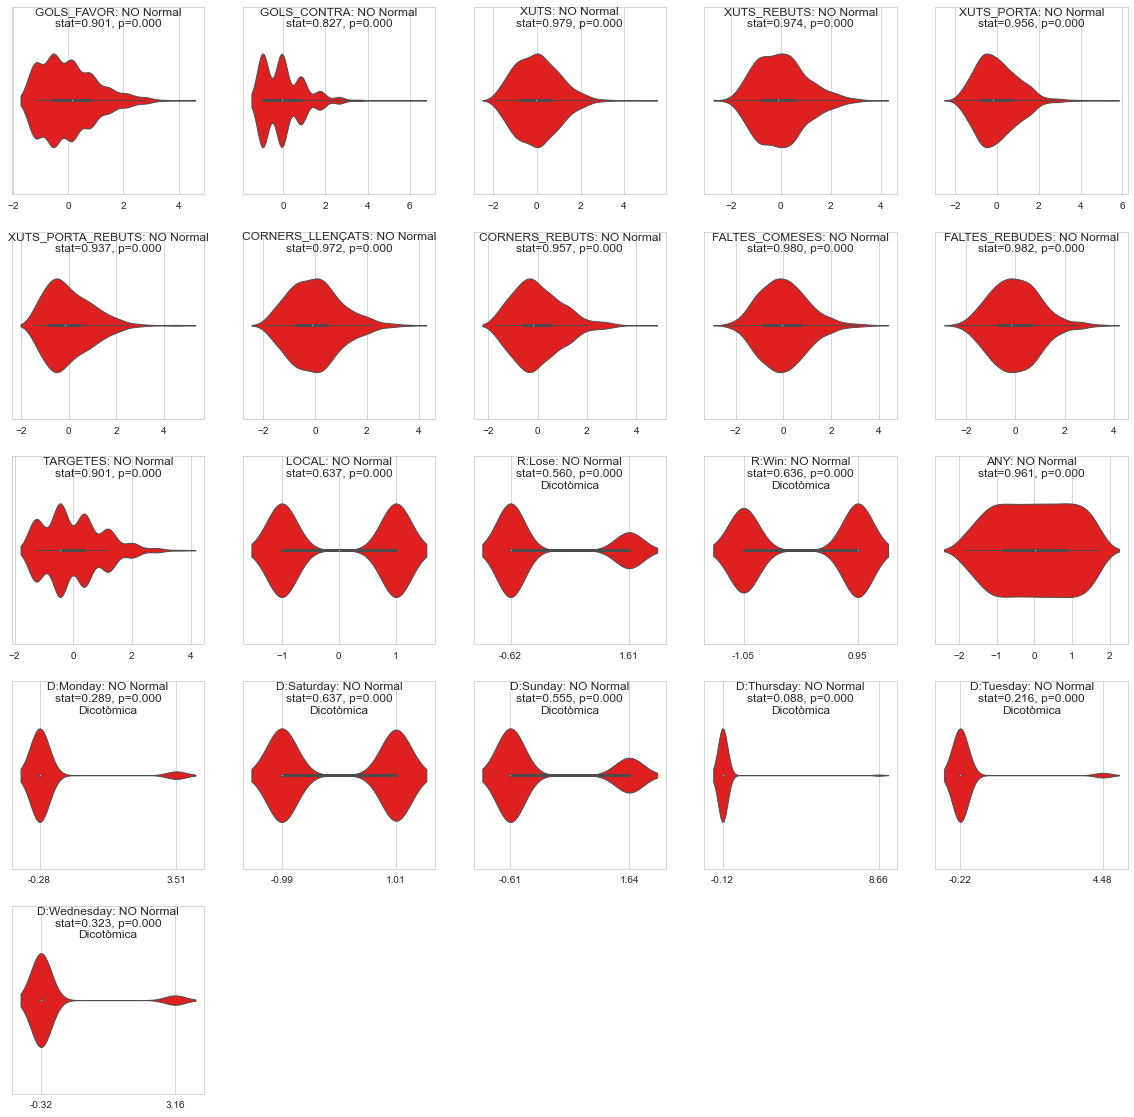

In [13]:
#dibuixem les dades estandaritzades. Podem observar que els seus rangs de valors s'ajusten als d'una distribució normal 
#tipificada, i com és una transformació lineal conserven la seva distribució original (totes no normals amb shapiro)
plot_distributions(standarized_data_df, standarized_data_df.columns)

## Exercici
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [14]:
#com ja tenim les dades estandatitzades (requisit pel correcte funcionament del PCA), utilitzem el dataframe creat
pca = PCA()
pca.fit(standarized_data_df)

#veiem el porcentatge de variança explicada per cada component
pca.explained_variance_ratio_

array([0.21150423, 0.09161749, 0.08290947, 0.08107607, 0.06177937,
       0.05876218, 0.05376342, 0.05226594, 0.04928475, 0.04589127,
       0.03749405, 0.03417536, 0.031905  , 0.02518621, 0.02079867,
       0.02071234, 0.01447472, 0.00924178, 0.00912783, 0.00738627,
       0.00064356])

In [15]:
#influència de les variables en cada component
index = ["PC" + str(i) for i in range(pca.n_components_)]
pca_df = pd.DataFrame(data=pca.components_, columns=standarized_data_df.columns, index=index)
pca_df

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,LOCAL,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
PC0,-0.282632,0.251188,-0.340422,0.308577,-0.249604,0.317563,-0.191879,0.245920,0.199319,0.147741,0.147245,-0.177606,0.294546,-0.316124,-0.278962,-0.010100,0.021214,0.032992,-0.007630,-0.024442,-0.062340
PC1,0.334377,-0.272517,-0.154711,0.284877,0.096758,0.181843,-0.374060,0.347850,0.162806,0.056134,0.043960,-0.065854,-0.406124,0.425198,-0.097999,0.090493,-0.051376,-0.002705,0.027125,0.034303,-0.038452
PC2,0.216920,0.327774,0.316293,0.308383,0.411180,0.404865,0.215987,0.168238,-0.187907,-0.265121,-0.163733,0.057954,0.140852,-0.005176,-0.048810,-0.010188,0.154743,0.008963,0.019370,-0.078589,-0.231806
PC3,0.055136,0.096949,0.072161,0.085506,0.026605,0.088344,0.017679,-0.037668,-0.075300,-0.068970,0.180778,-0.140862,0.047786,-0.014614,0.217947,0.078946,-0.681786,0.601081,0.052076,0.093962,0.089145
PC4,-0.047681,-0.052825,0.131155,-0.172613,0.284325,-0.080423,0.216380,0.044726,0.370417,0.399006,0.111571,0.313957,0.009789,-0.030357,-0.345777,0.356530,-0.101923,0.185608,-0.086160,-0.166971,-0.276668
PC5,-0.141253,-0.069495,-0.089561,0.026911,0.050219,0.081769,0.006688,0.149604,-0.257186,0.019827,-0.500287,0.273839,0.035429,-0.070913,-0.271912,0.307122,-0.324888,-0.201067,0.095569,0.154516,0.435307
PC6,-0.058581,-0.015993,0.096561,0.005248,0.045490,-0.002315,0.101972,-0.021521,-0.019289,-0.029401,0.183878,-0.374348,0.024697,-0.026411,0.104530,0.512747,-0.037090,-0.352285,-0.139617,0.571027,-0.229459
PC7,-0.148885,-0.225721,-0.068550,0.000005,-0.043186,0.014943,0.132659,0.119786,-0.184516,0.167261,-0.284051,0.082504,-0.103462,-0.034416,-0.115402,-0.429987,0.021763,0.286982,-0.178029,0.509275,-0.393257
PC8,-0.015825,0.012441,-0.017345,-0.018546,-0.068261,0.020116,0.059909,-0.008027,0.066376,0.032353,0.103859,0.184851,-0.007545,-0.001786,0.056030,-0.051296,-0.036646,-0.103072,0.912974,0.188965,-0.229774
PC9,0.171997,0.204806,0.101011,0.011330,0.249164,0.092595,0.077668,-0.080771,0.262680,0.231787,0.288355,0.127582,0.064301,0.053409,-0.102084,-0.407784,-0.046704,-0.184539,-0.081048,0.415114,0.462552


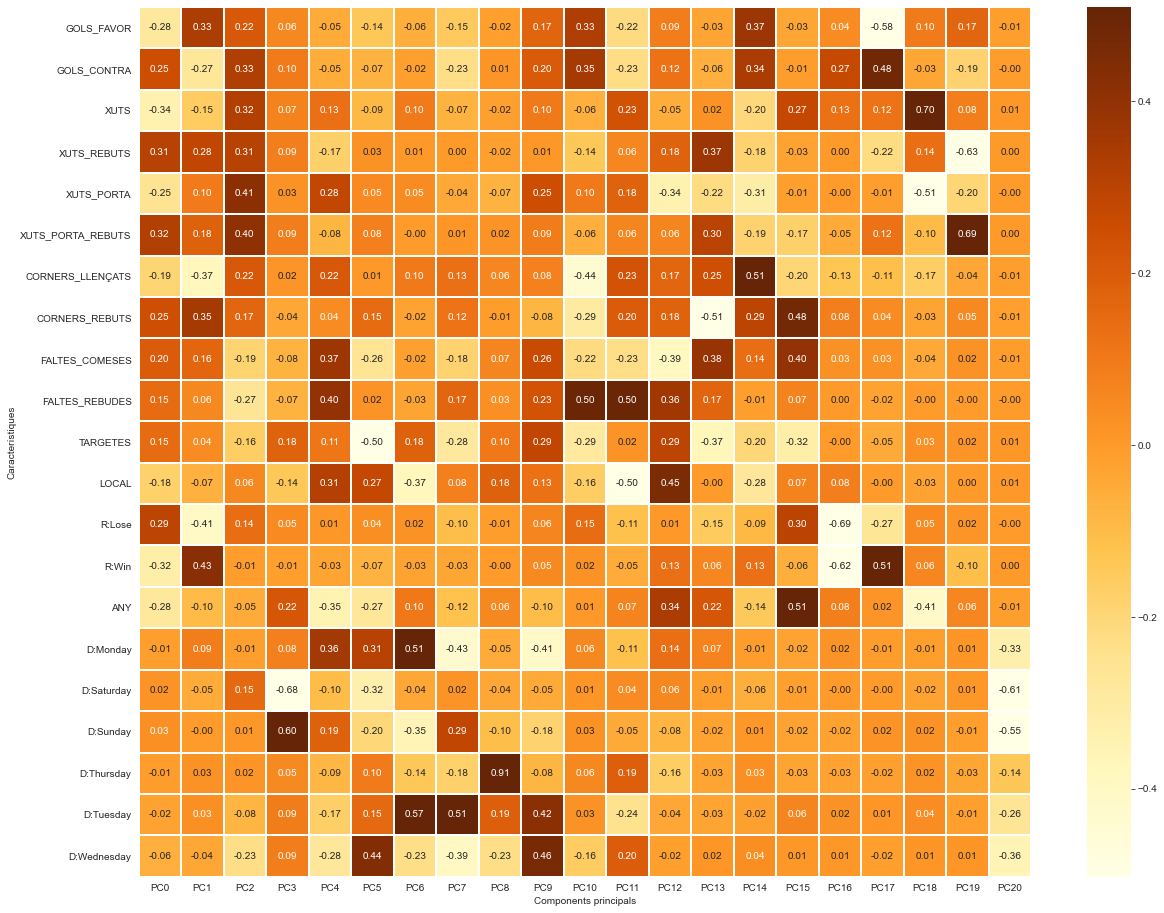

In [16]:
#Podem visualitzar La influència de les variables en cada component amb un heatmap
plt.figure(figsize=(20,16))
sns.heatmap(pca_df.T, annot=True, annot_kws={"size": 10}, cmap="YlOrBr", fmt='.2f', robust=True, linewidths=1, linecolor="w")
plt.xlabel("Components principals")
plt.ylabel("Característiques")
plt.show()

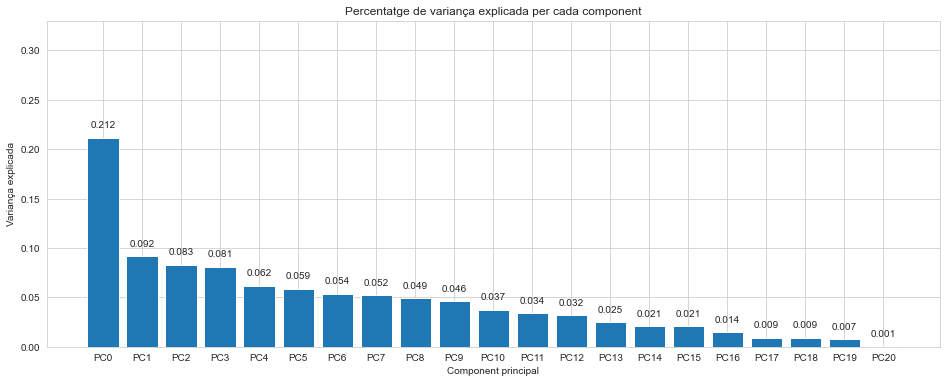

In [17]:
#Dibuixem amb un gràfic de barres aquest percentatge de variança explicada per cada component
plt.figure(figsize=(16, 6))
plt.bar(x=np.arange(pca.n_components_), height=pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(standarized_data_df.columns)), pca.explained_variance_ratio_):
    plt.annotate(round(y, 3), (x,y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(np.arange(pca.n_components_), labels=pca_df.index)
plt.ylim(0, .33)
plt.title('Percentatge de variança explicada per cada component')
plt.xlabel('Component principal')
plt.ylabel('Variança explicada')
plt.show()

In [18]:
#Observem el percentatge de variança explicada acumulada
pca.explained_variance_ratio_.cumsum()

array([0.21150423, 0.30312172, 0.38603119, 0.46710727, 0.52888663,
       0.58764881, 0.64141223, 0.69367817, 0.74296292, 0.78885419,
       0.82634824, 0.8605236 , 0.89242861, 0.91761481, 0.93841349,
       0.95912582, 0.97360055, 0.98284233, 0.99197016, 0.99935644,
       1.        ])

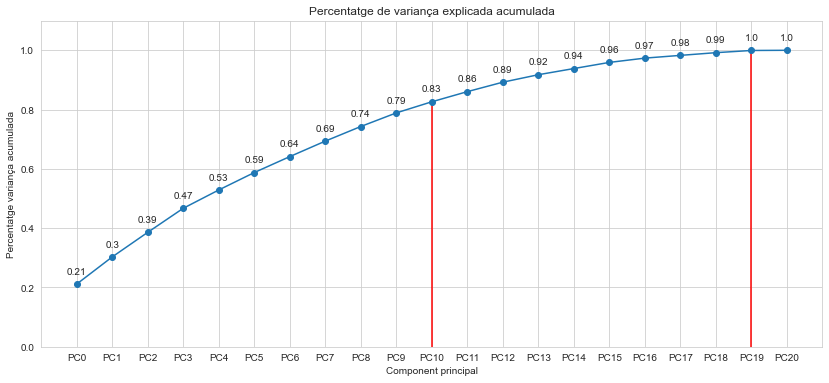

In [19]:
#Podem dibuixar la acumulació
varianca_acum = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(standarized_data_df.columns)), varianca_acum, marker='o')

for x, y in zip(np.arange(len(standarized_data_df.columns)), varianca_acum):
    label = round(y, 2)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

plt.ylim(0, 1.1)
plt.xticks(np.arange(pca.n_components_), labels=pca_df.index)
plt.vlines(x=[10, 19], ymin=0, ymax=[varianca_acum[10], 1], color="r")

plt.title('Percentatge de variança explicada acumulada')
plt.xlabel('Component principal')
plt.ylabel('Percentatge variança acumulada')
plt.show()

*Podem concloure que aplicant el metode d'extracció dels components principals al nostre conjunt de dades:*
- *podem reduïr el nou dataframe de PCs en una dimensió respecte al de l'origen de dades sense perdre cap informació.*
- *podem reduïr a quasi la meitat de dimensions (de 21 a 11) conservant el 83% de la informació*

## Exercici

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

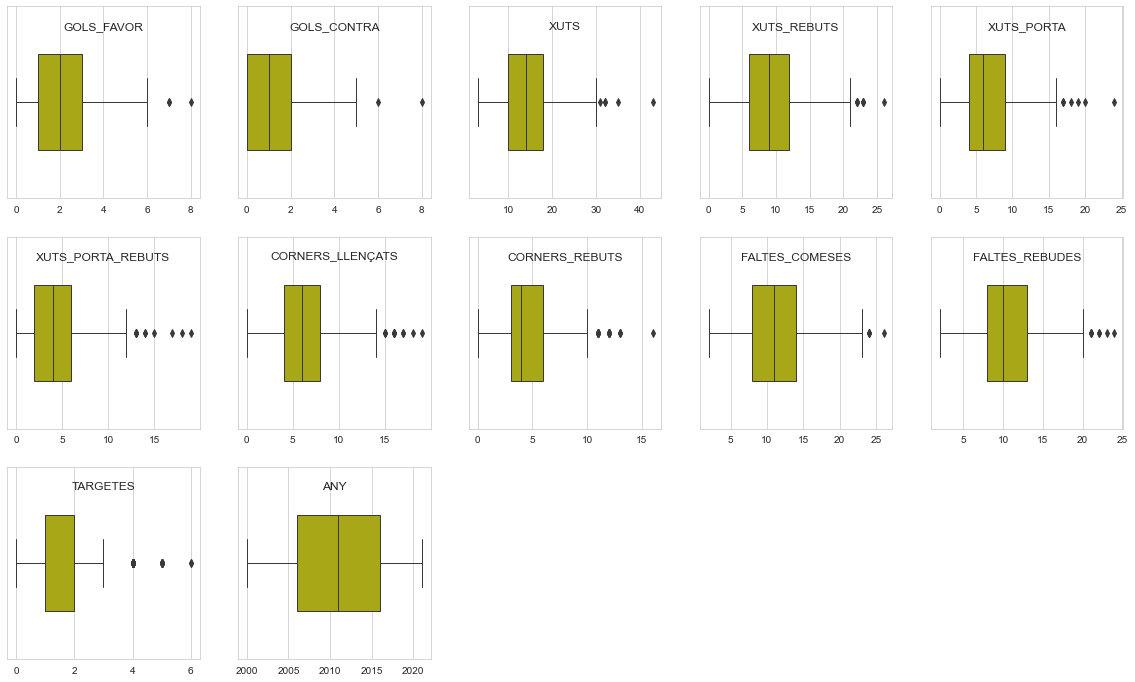

In [20]:
#definim una funció per dibuixar les distribucions en boxplot de les columnes especificades d'un dataframe
def boxplots(df, cols, color="y"):
    cols = list(cols)
    dec, num = math.modf(len(cols)/5)
    if dec == 0: rows = int(num)
    else: rows = int(num+1)
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,rows*4))
    for i, col in zip(range(len(cols)), cols):
        plt.subplot(rows, 5, i+1)
        ax = sns.boxplot(x=col, data=df, color=color, orient='h', linewidth=1 , width=.5)
        plt.title(col, y=.85)
        plt.xlabel("")
    plt.show()

#separem les columnes en binaries i no binàries, en dues llistes
binary = {0, 1}
cat_cols, num_cols = [], []

for col in team_data_df.columns:
    if set(team_data_df[col].value_counts().index.to_list()) != binary:
        num_cols.append(col)
    else: cat_cols.append(col)    

#per tractar els outliers ens quedarem amb les columnes numèriques amb dades no binàries.
#dibuixem les distribucions de les nostres dades per observar, amb els limits del boxplot, els valors atípics (en punts)
boxplots(team_data_df, num_cols)

### Mètode ajustant ouliers a màxims i mínims i normalització amb MinMaxScaler

*Tenint en compte, per definició, q els valors atípics son aquells que es trobin per sobre de $q3 + 1.5 * IQR$ o per sota de $q1 - 1.5 * IQR$ depen de la nostra desició si els prenem com errors (i els eliminem), o si els considerem com a casos excepcionals (i els establim a un màxim/mínim perque no ens modifiquin amb un factor tant elevat les tendències centrals).*

*Essent, el nostre cas, dades extretes d'una web oficial i amb poca possiblitat d'error, els tractarem com el segon cas i els canviarem de valor a un màxim/mínim no atipic.*

In [21]:
#definim un procés per crear un nou dataframe sense outliers. Els establirà als valor màxims i mínims dels límits 
#no considerats com a outliers, quan els trobi
def minmax_outliers(series):
    riq = series.quantile(q=.75) - series.quantile(q=.25)
    return series.quantile(q=.25) - 1.5*riq, series.quantile(q=.75) + 1.5*riq

def fix_outliers(value, minim, maxim):
    if value < minim: return minim
    elif value > maxim: return maxim
    else: return value

team_data_wo_out_df = pd.DataFrame()
for col in num_cols:
    minim, maxim = minmax_outliers(team_data_df[col])
    team_data_wo_out_df[col] = team_data_df[col].apply(fix_outliers, args=(minim, maxim))
team_data_wo_out_df.head()

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,ANY
15,4.0,2.0,15.0,9.0,10.0,4.0,7.0,3.0,23.0,14.0,3.0,2000
23,1.0,2.0,14.0,9.0,5.0,8.0,5.0,5.0,7.0,12.0,2.0,2000
57,1.0,1.0,11.0,4.0,4.0,2.0,9.0,3.0,15.0,11.0,2.0,2000
73,0.0,1.0,9.0,15.0,7.0,9.0,10.0,8.0,16.0,12.0,0.0,2000
85,2.0,0.0,13.0,10.0,10.0,2.0,5.0,6.0,10.0,16.0,0.0,2000


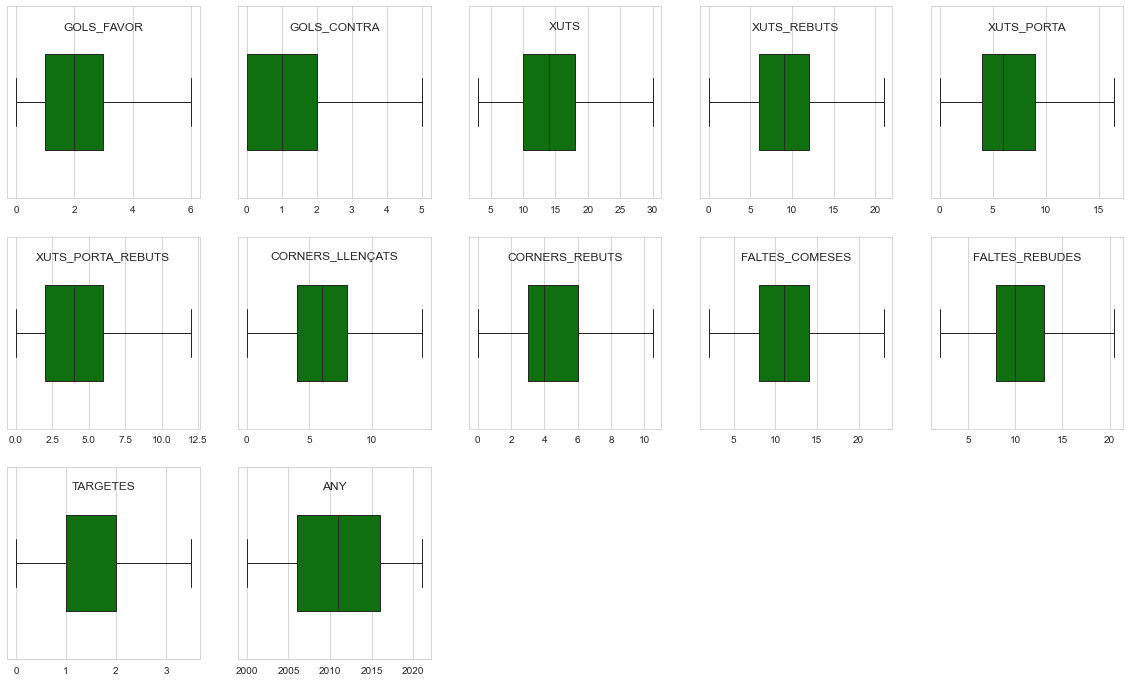

In [22]:
#dibuixem ara les noves distribucions de les nostres dades, amb els outliers modificats
boxplots(team_data_wo_out_df, num_cols, "g")

In [23]:
#podem observar, comparant les mitjanes, abans i despres de tractar els outliers que com tots els ouliers eren a la part 
#positiva, i no eren massa extrems, han baixat totes les mitjanes una mica exepte ANY, que no en tenia cap
pd.concat([team_data_df[num_cols].mean(), team_data_wo_out_df.mean()], axis=1, keys=["mean original","mean sense outliers"])

,mean original,mean sense outliers
GOLS_FAVOR,1.814474,1.809211
GOLS_CONTRA,1.078947,1.073684
XUTS,14.342105,14.311842
XUTS_REBUTS,9.536842,9.518421
XUTS_PORTA,6.552632,6.531579
XUTS_PORTA_REBUTS,4.513158,4.475000
CORNERS_LLENÇATS,6.443421,6.406579
CORNERS_REBUTS,4.528947,4.487500
FALTES_COMESES,11.242105,11.234211
FALTES_REBUDES,10.610526,10.596711


In [24]:
#concatenem les columnes numèriques binàries, que hem separat, per no haver-les de tractar
team_data_wo_out_df = pd.concat([team_data_wo_out_df, team_data_df[cat_cols]], axis=1)

#per continuar amb els requisits de l'excercici, normalitzem els valors. Com no s'especifica quin tipus de normalització
#i, segons el contexte se n'aplica una o altre, en aquest cas com no hi ha números negatius aplicarem la MinMax scaler per un
#rang d'entrada d'entre de 0 a 1 (default)
minmaxscaler = preprocessing.MinMaxScaler()
normalized_data_df = pd.DataFrame(minmaxscaler.fit_transform(team_data_wo_out_df), columns=team_data_wo_out_df.columns)
normalized_data_df.head()

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,ANY,LOCAL,R:Lose,R:Win,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
0,0.666667,0.4,0.444444,0.428571,0.606061,0.333333,0.500000,0.285714,1.000000,0.648649,0.857143,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.166667,0.4,0.407407,0.428571,0.303030,0.666667,0.357143,0.476190,0.238095,0.540541,0.571429,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.166667,0.2,0.296296,0.190476,0.242424,0.166667,0.642857,0.285714,0.619048,0.486486,0.571429,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.2,0.222222,0.714286,0.424242,0.750000,0.714286,0.761905,0.666667,0.540541,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.370370,0.476190,0.606061,0.166667,0.357143,0.571429,0.380952,0.756757,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


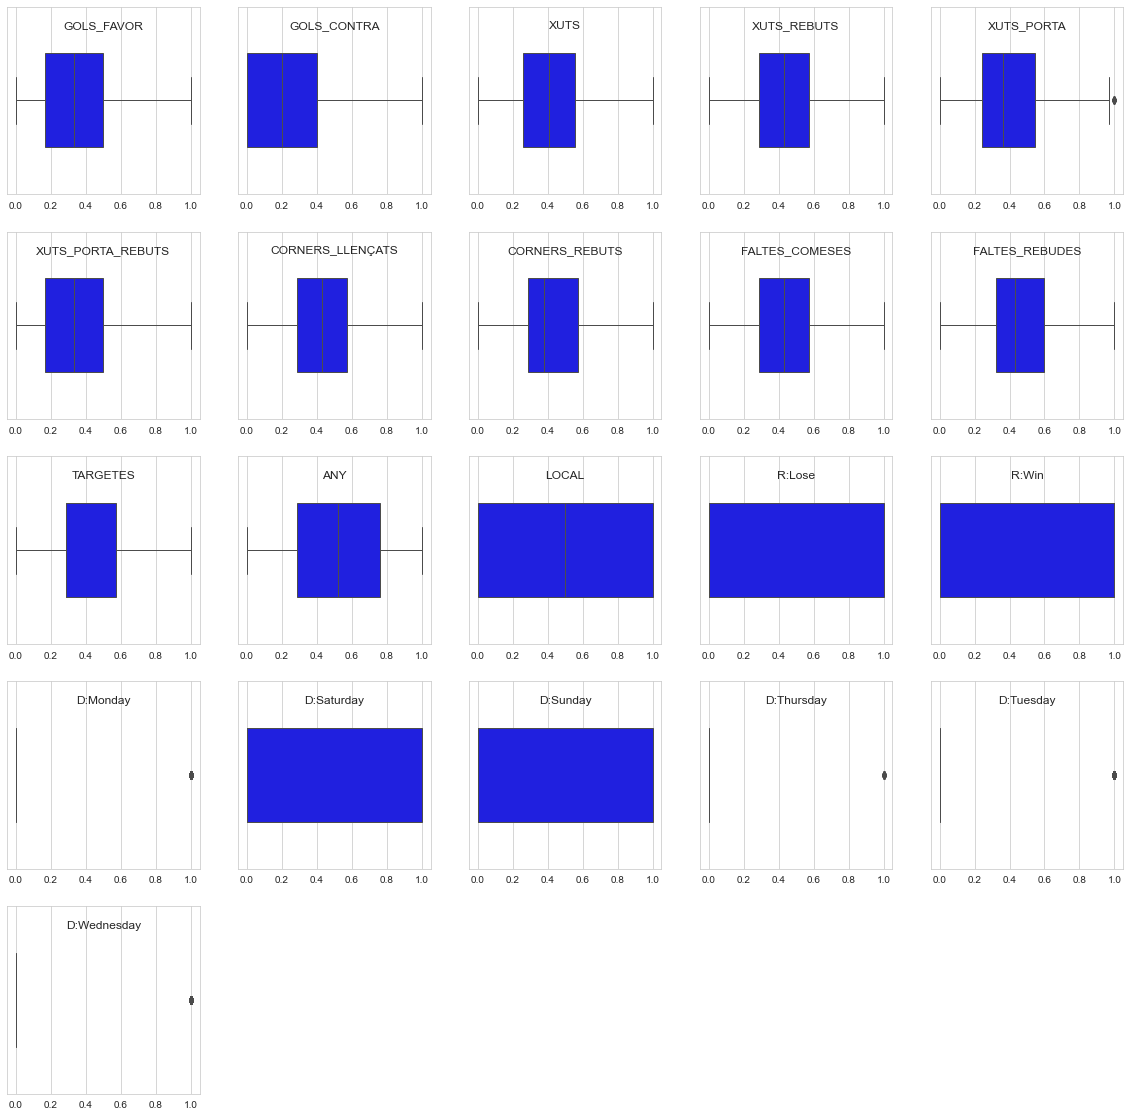

In [25]:
#si dibuixem ara els boxplots, amb els outliers tractats i amb MinMaxScaler. Veiem els rangs de dades de 0 a 1
boxplots(normalized_data_df, normalized_data_df.columns, "b")

### Mètode de escalament amb RobustScaler

*Robust Scaler resta la mediana i divideix entre el rang interquantil (IQR) a cada valor i **s'utilitza quan tenim dades atípiques i no volem que tinguin molta influència**.*

In [26]:
#primer creem un procés per generar la normalització segons la definició i després ho farem amb RobustScaler d'sklearn
def rs_value(value, col, df):
    med, riq = df.loc[col, "MED"], df.loc[col, "RIQ"]
    return (value - med) / riq

def robust_scaler(df):
    riq_s = (df.quantile(q=.75) - df.quantile(q=.25)).rename("RIQ")
    med_riq_df = pd.concat([df.median().rename("MED"), riq_s], axis=1)
    
    rs_df = pd.DataFrame()
    for col in df.columns: rs_df = pd.concat([rs_df, df[col].apply(rs_value, args=(col, med_riq_df))], axis=1)
    return rs_df

normalized_data_df = robust_scaler(team_data_df)
normalized_data_df.head(3)

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,LOCAL,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
15,1.0,0.5,0.125,0.000000,0.8,0.0,0.25,-0.333333,2.166667,0.8,2.0,0.5,0.0,0.0,-1.1,NaN,0.0,0.0,NaN,NaN,inf
23,-0.5,0.5,0.000,0.000000,-0.2,1.0,-0.25,0.333333,-0.666667,0.4,1.0,0.5,1.0,-1.0,-1.1,NaN,1.0,0.0,NaN,NaN,NaN
57,-0.5,0.0,-0.375,-0.833333,-0.4,-0.5,0.75,-0.333333,0.666667,0.2,1.0,0.5,0.0,-1.0,-1.1,NaN,0.0,1.0,NaN,NaN,NaN


In [27]:
#les columnes numèriques contínues ens ho fa correctament, pero a les binàries veiem rangs interquantils de 0, 
#el que ens ocasiona divisions per 0
def robust_scaler(df):
    riq_s = (df.quantile(q=.75) - df.quantile(q=.25)).rename("riq")
    return pd.concat([df.median().rename("mediana"), riq_s], axis=1)
robust_scaler(team_data_df).T.iloc[:,12:]

,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
mediana,0.0,1.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0
riq,1.0,1.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0


In [28]:
#veiem que a les columnes binàries ens donen valors d'infinit, producte de la divisió de rangs interquantils de 0 on predomina
#el valor zero
pd.concat([normalized_data_df.min().rename("mínim"), normalized_data_df.max().rename("màxim")], axis=1).T.iloc[:,12:]

,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
mínim,0.0,-1.0,-1.1,inf,0.0,0.0,inf,inf,inf
màxim,1.0,0.0,1.0,inf,1.0,1.0,inf,inf,inf


In [29]:
#si ho fem amb RobustScaler d'sklearn ens surten el mateixos resultats per les columnes de dades numèriques contínues, 
#però les dades d'informació categòrica amb valors binaris ens les tracta difererent doncs hi veiem infinits
robustescaler = preprocessing.RobustScaler()
normalized_data_df = pd.DataFrame(robustescaler.fit_transform(team_data_df), columns=team_data_df.columns)
normalized_data_df.head(3)

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,LOCAL,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
0,1.0,0.5,0.125,0.000000,0.8,0.0,0.25,-0.333333,2.166667,0.8,2.0,0.5,0.0,0.0,-1.1,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.5,0.5,0.000,0.000000,-0.2,1.0,-0.25,0.333333,-0.666667,0.4,1.0,0.5,1.0,-1.0,-1.1,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.5,0.0,-0.375,-0.833333,-0.4,-0.5,0.75,-0.333333,0.666667,0.2,1.0,0.5,0.0,-1.0,-1.1,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
#amb sklearn en aquestes columnes binàries supera d'alguna manera aquestes divisions per 0 doncs sens normalitzen
pd.concat([normalized_data_df.min().rename("mínim"), normalized_data_df.max().rename("màxim")], axis=1).T.iloc[:,12:]

,R:Lose,R:Win,ANY,D:Monday,D:Saturday,D:Sunday,D:Thursday,D:Tuesday,D:Wednesday
mínim,0.0,-1.0,-1.1,0.0,0.0,0.0,0.0,0.0,0.0
màxim,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
#observem la normalització de les columnes binàries
cols = ["R:Win", "R:Lose"]
compare = []
for col in cat_cols:
    compare.append(pd.concat([team_data_df[col].value_counts(), normalized_data_df[col].value_counts()], 
              axis=1, keys=[col+":abans", col+":despres"]))
pd.concat(compare, axis=1)

,LOCAL:abans,LOCAL:despres,R:Lose:abans,R:Lose:despres,R:Win:abans,R:Win:despres,D:Monday:abans,D:Monday:despres,D:Saturday:abans,D:Saturday:despres,D:Sunday:abans,D:Sunday:despres,D:Thursday:abans,D:Thursday:despres,D:Tuesday:abans,D:Tuesday:despres,D:Wednesday:abans,D:Wednesday:despres
-1.0,NaN,NaN,NaN,NaN,NaN,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.5,NaN,380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0,380.0,NaN,549.0,549.0,361.0,399.0,703.0,703.0,385.0,385.0,554.0,554.0,750.0,750.0,724.0,724.0,691.0,691.0
0.5,NaN,380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,380.0,NaN,211.0,211.0,399.0,NaN,57.0,57.0,375.0,375.0,206.0,206.0,10.0,10.0,36.0,36.0,69.0,69.0


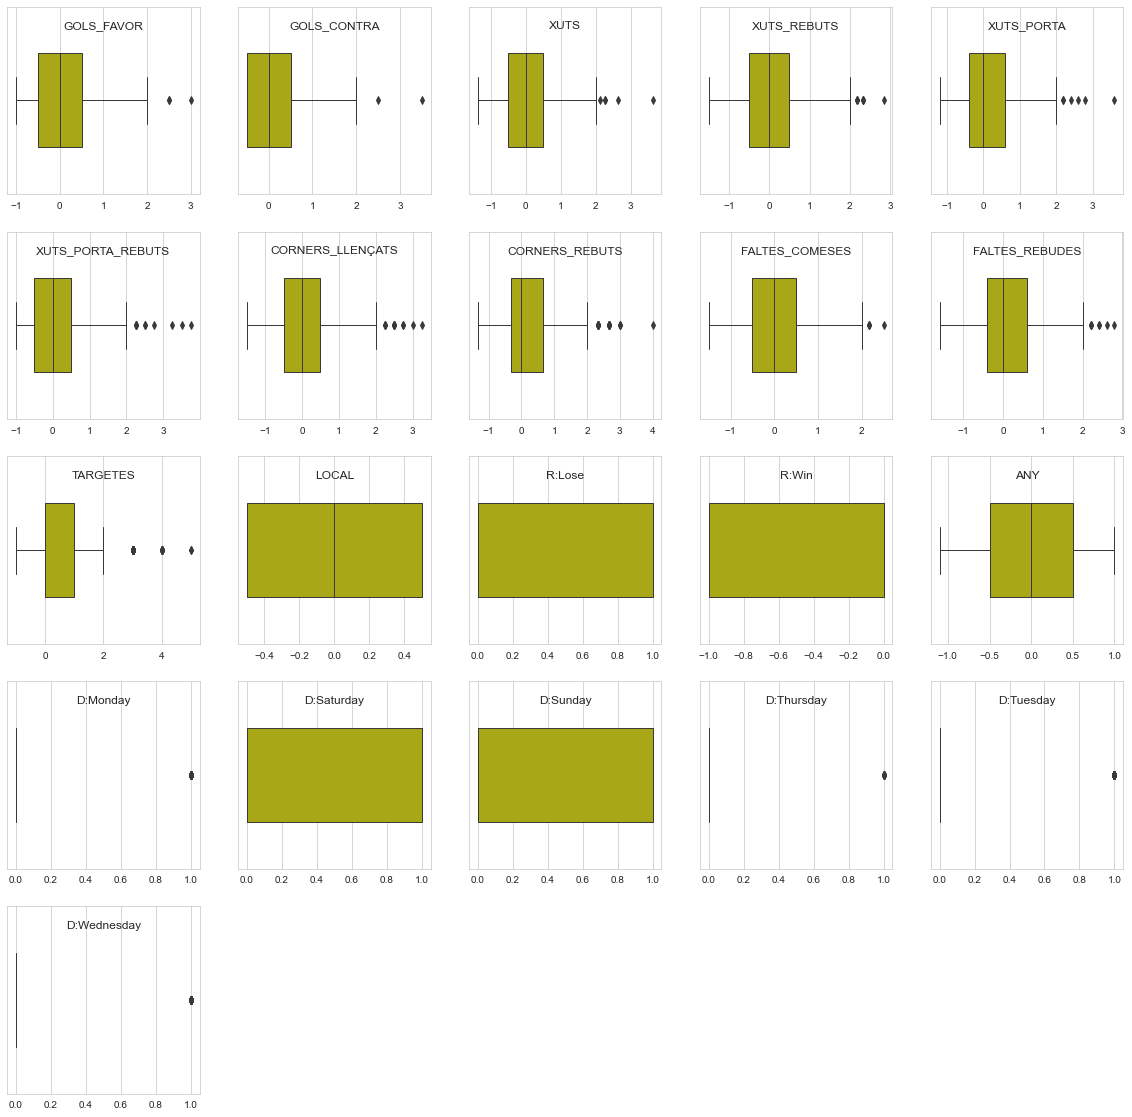

In [32]:
#dibuixem les distribucions de les nostres dades despres d'aplicar el robust scaler
boxplots(normalized_data_df, normalized_data_df.columns)

Concluïm que amb normalització **robust scaler** (aconsellat amb valors atípics) hi seguim tenint els valors atípics al ser transformacions de dades lineals, tan sols hi disminuïm el seu pes. Si desitgem retallar aquests valors atípics necessitem transformacions no lineals.